## Machine Learning

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

# Regresion lineal

In [4]:
df = pd.DataFrame()
df["Area"] = [2600, 3000, 3200, 3600, 4000]
df["Precio"] = [550000, 565000, 610000, 680000, 725000]

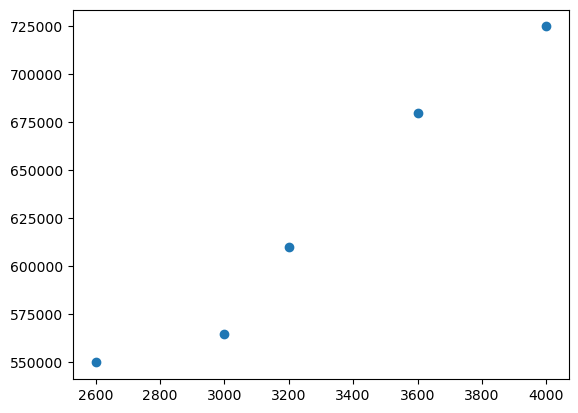

In [5]:
plt.scatter(df['Area'],df['Precio']);

In [6]:
X = df[['Area']]

In [7]:
y = df['Precio']

In [19]:
modelo = linear_model.LinearRegression()

In [9]:
modelo.fit(X, y)

LinearRegression()

In [10]:
modelo.predict([[3300]])

/home/anderson-josue/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

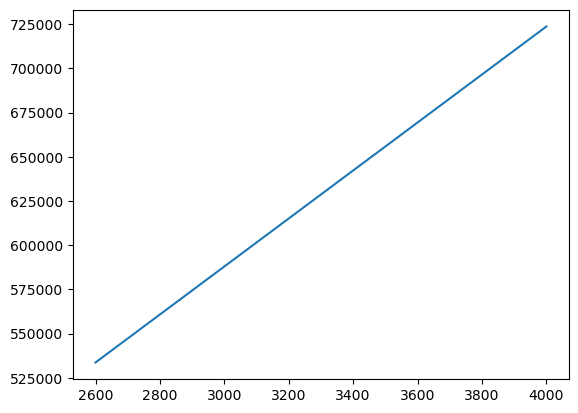

In [12]:
plt.plot(df['Area'], modelo.predict(X));

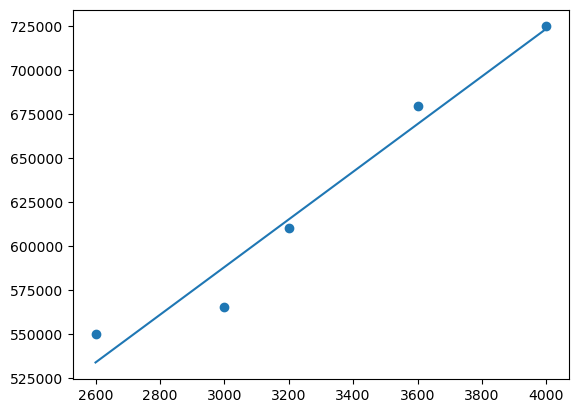

In [14]:
plt.scatter(df['Area'], 
         df['Precio'])
plt.plot(df['Area'], modelo.predict(X));

In [15]:
df = pd.DataFrame()
df['Edad'] = [25, 30, 35, 40, 45]
df['Salario'] = [3000, 3500, 4000, 4500, 5000]

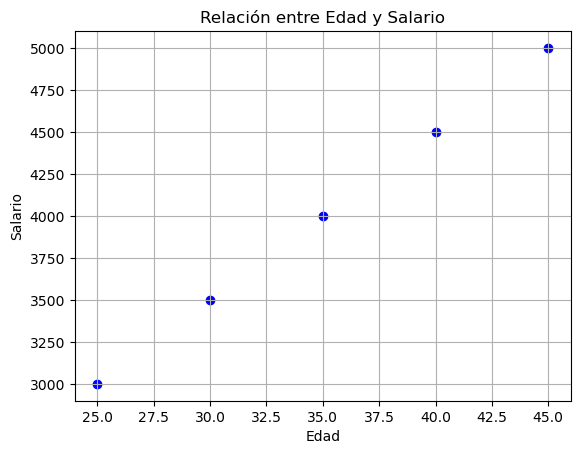

In [26]:
plt.scatter(df['Edad'], df['Salario'], color='blue', marker='o')
plt.grid()
plt.title('Relación entre Edad y Salario')
plt.xlabel('Edad')
plt.ylabel('Salario');


# Regresion logistica

In [14]:
ruta = '/home/anderson-josue/Documents/Data Science/Day 11/datos_seguro.csv'
df = pd.read_csv(ruta)
df

,edad,compra
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


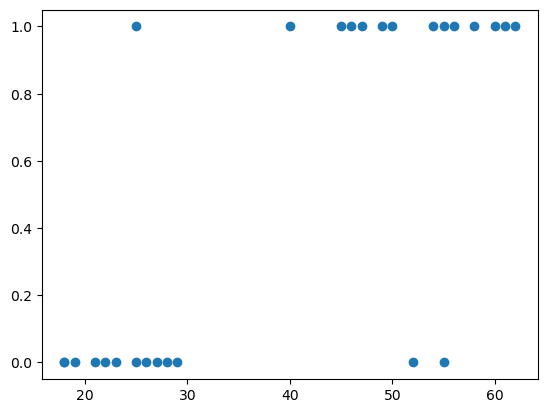

In [34]:
plt.scatter(df['edad'], df['compra']);

In [15]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(df[['edad']], df['compra'], train_size=0.9)

In [16]:
modelo = LogisticRegression()

In [17]:
modelo.fit(X_entrena, y_entrena)

LogisticRegression()

In [18]:
modelo.score(X_prueba, y_prueba)

1.0

In [45]:
datos_nuevos = pd.DataFrame({'edad': [25,35,45,55]})

In [46]:
datos_nuevos

,edad
0,25
1,35
2,45
3,55


In [47]:
probabilidades = modelo.predict_proba(datos_nuevos)
probabilidades

array([[0.9332244 , 0.0667756 ],
       [0.72868594, 0.27131406],
       [0.34043051, 0.65956949],
       [0.09023915, 0.90976085]])

In [48]:
prob_compra = probabilidades[:, 1]
prob_compra

array([0.0667756 , 0.27131406, 0.65956949, 0.90976085])

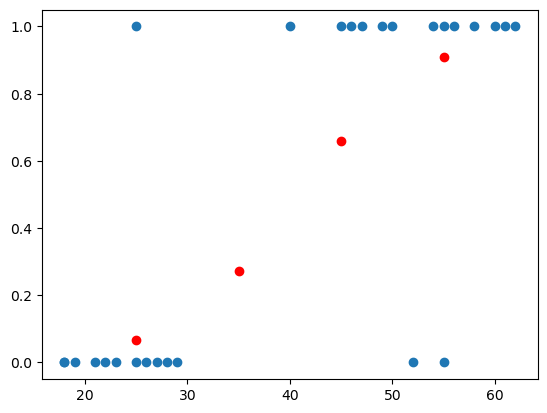

In [49]:
plt.scatter(df['edad'], df['compra'])
plt.scatter(datos_nuevos['edad'], prob_compra, color='red');


Text(0, 0.5, 'Compra de seguros')

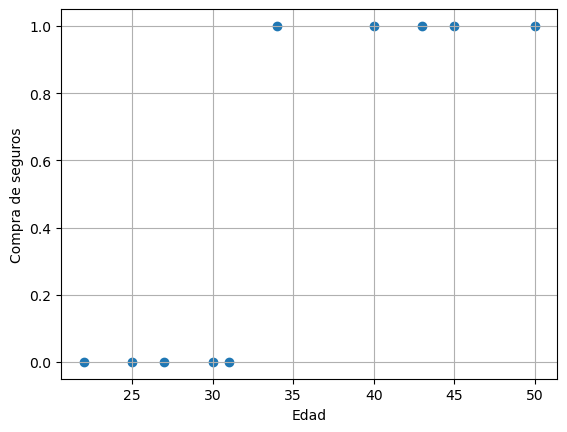

In [56]:
datos = {
    'edad': [25, 30, 45, 22, 34, 40, 27, 31, 43, 50],
    'salario': [50000, 54000, 72000, 42000, 62000, 68000, 49000, 56000, 76000, 90000],
    'compra': [0, 0, 1, 0, 1, 1, 0, 0, 1, 1]
}

df = pd.DataFrame(datos)
plt.scatter(df['edad'], df['compra'])
plt.grid(True)
plt.xlabel('Edad')
plt.ylabel('Compra de seguros')

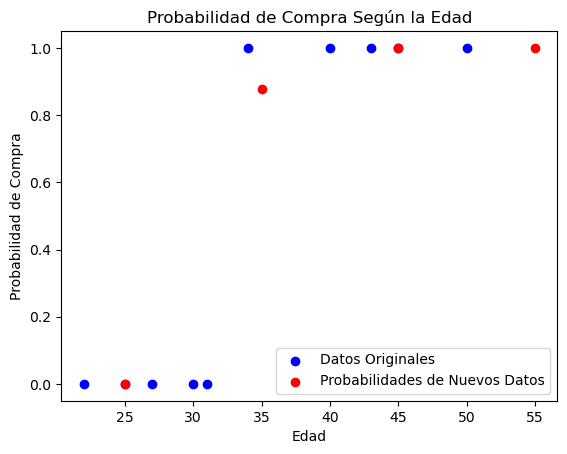

In [59]:
 # Crear un DataFrame de ejemplo con datos de clientes
datos = {
    'edad': [25, 30, 45, 22, 34, 40, 27, 31, 43, 50],
    'salario': [50000, 54000, 72000, 42000, 62000, 68000, 49000, 56000, 76000, 90000],
    'compra': [0, 0, 1, 0, 1, 1, 0, 0, 1, 1]
}
 
df = pd.DataFrame(datos)
 
# Separar las características y la variable objetivo
X = df[['edad']]
y = df['compra']
 
# Dividir los datos en conjuntos de entrenamiento y prueba (90% entrenamiento, 10% prueba)
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, train_size=0.9, random_state=42)
 
# Crear y entrenar el modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(X_entrena, y_entrena)  # Importante: entrenar el modelo
 
# Crear un nuevo DataFrame con la columna 'edad'
datos_nuevos = pd.DataFrame({
    'edad': [25, 35, 45, 55]
})
 
# Usar el modelo para predecir las probabilidades para el nuevo DataFrame
prob_compra = modelo.predict_proba(datos_nuevos)[:, 1]  # Toma solo la probabilidad de la clase 1 (compra)
 
# Gráfica de los datos originales
plt.scatter(df['edad'], df['compra'], color='blue', label='Datos Originales')
 
# Gráfica de las probabilidades de compra para los nuevos datos
plt.scatter(datos_nuevos['edad'], prob_compra, color='red', label='Probabilidades de Nuevos Datos')
 
# Añadir detalles al gráfico
plt.xlabel('Edad')
plt.ylabel('Probabilidad de Compra')
plt.title('Probabilidad de Compra Según la Edad')
plt.legend()
plt.show()

# Arboles de decision

In [62]:
df = sns.load_dataset('iris')

In [63]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [64]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [65]:
X = df.drop('species', axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [67]:
le = LabelEncoder()
especies = le.fit_transform(df['species'])

In [68]:
y = especies
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [69]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, train_size=0.8, random_state=42)

In [71]:
arbol = DecisionTreeClassifier()

In [ ]:
arbol.fit(X_entrena, y_entrena)

DecisionTreeClassifier()

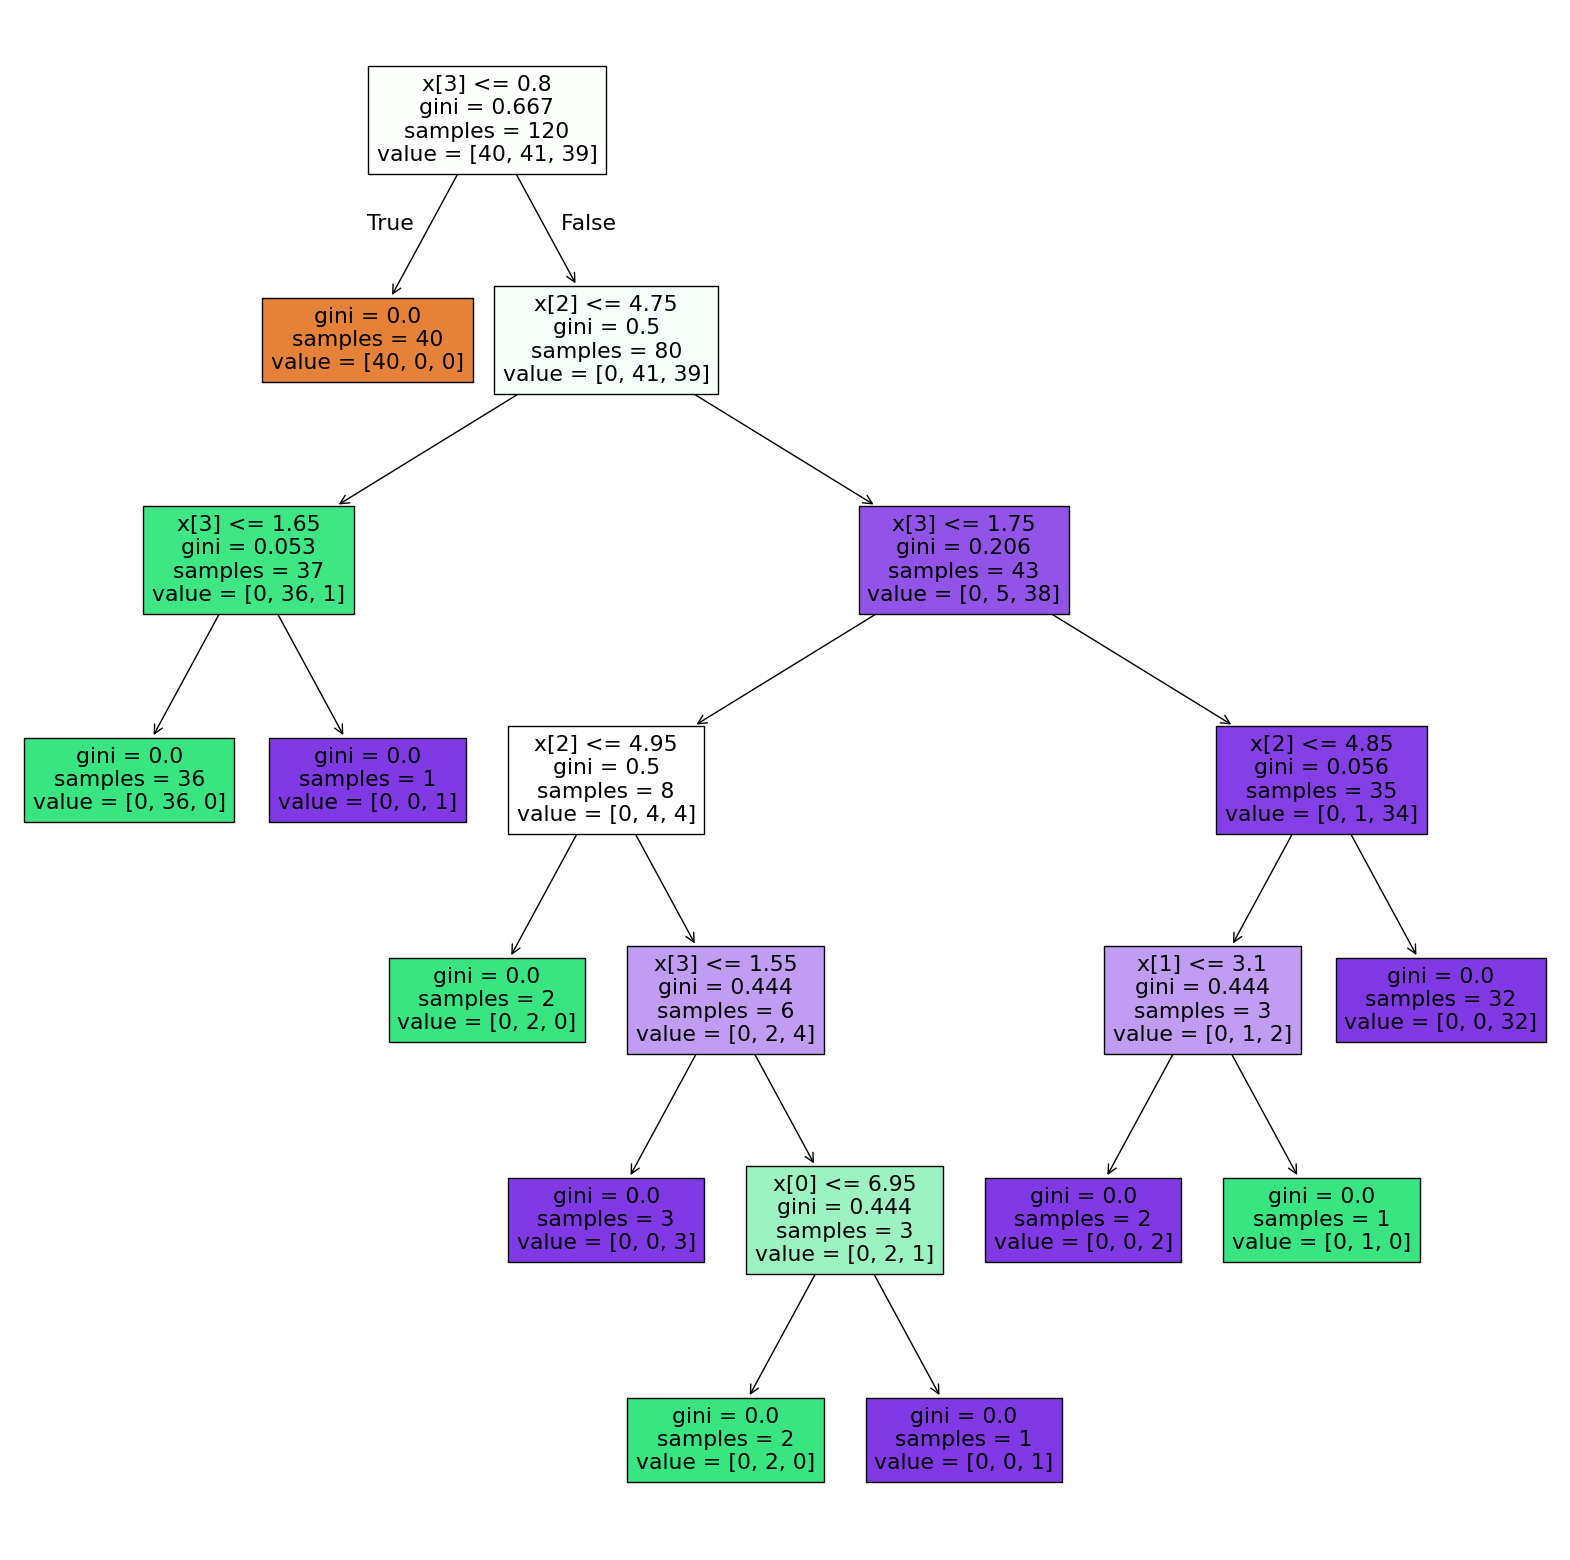

In [80]:
plt.figure(figsize=(20,20))
plot_tree(decision_tree=arbol,
          filled=True);


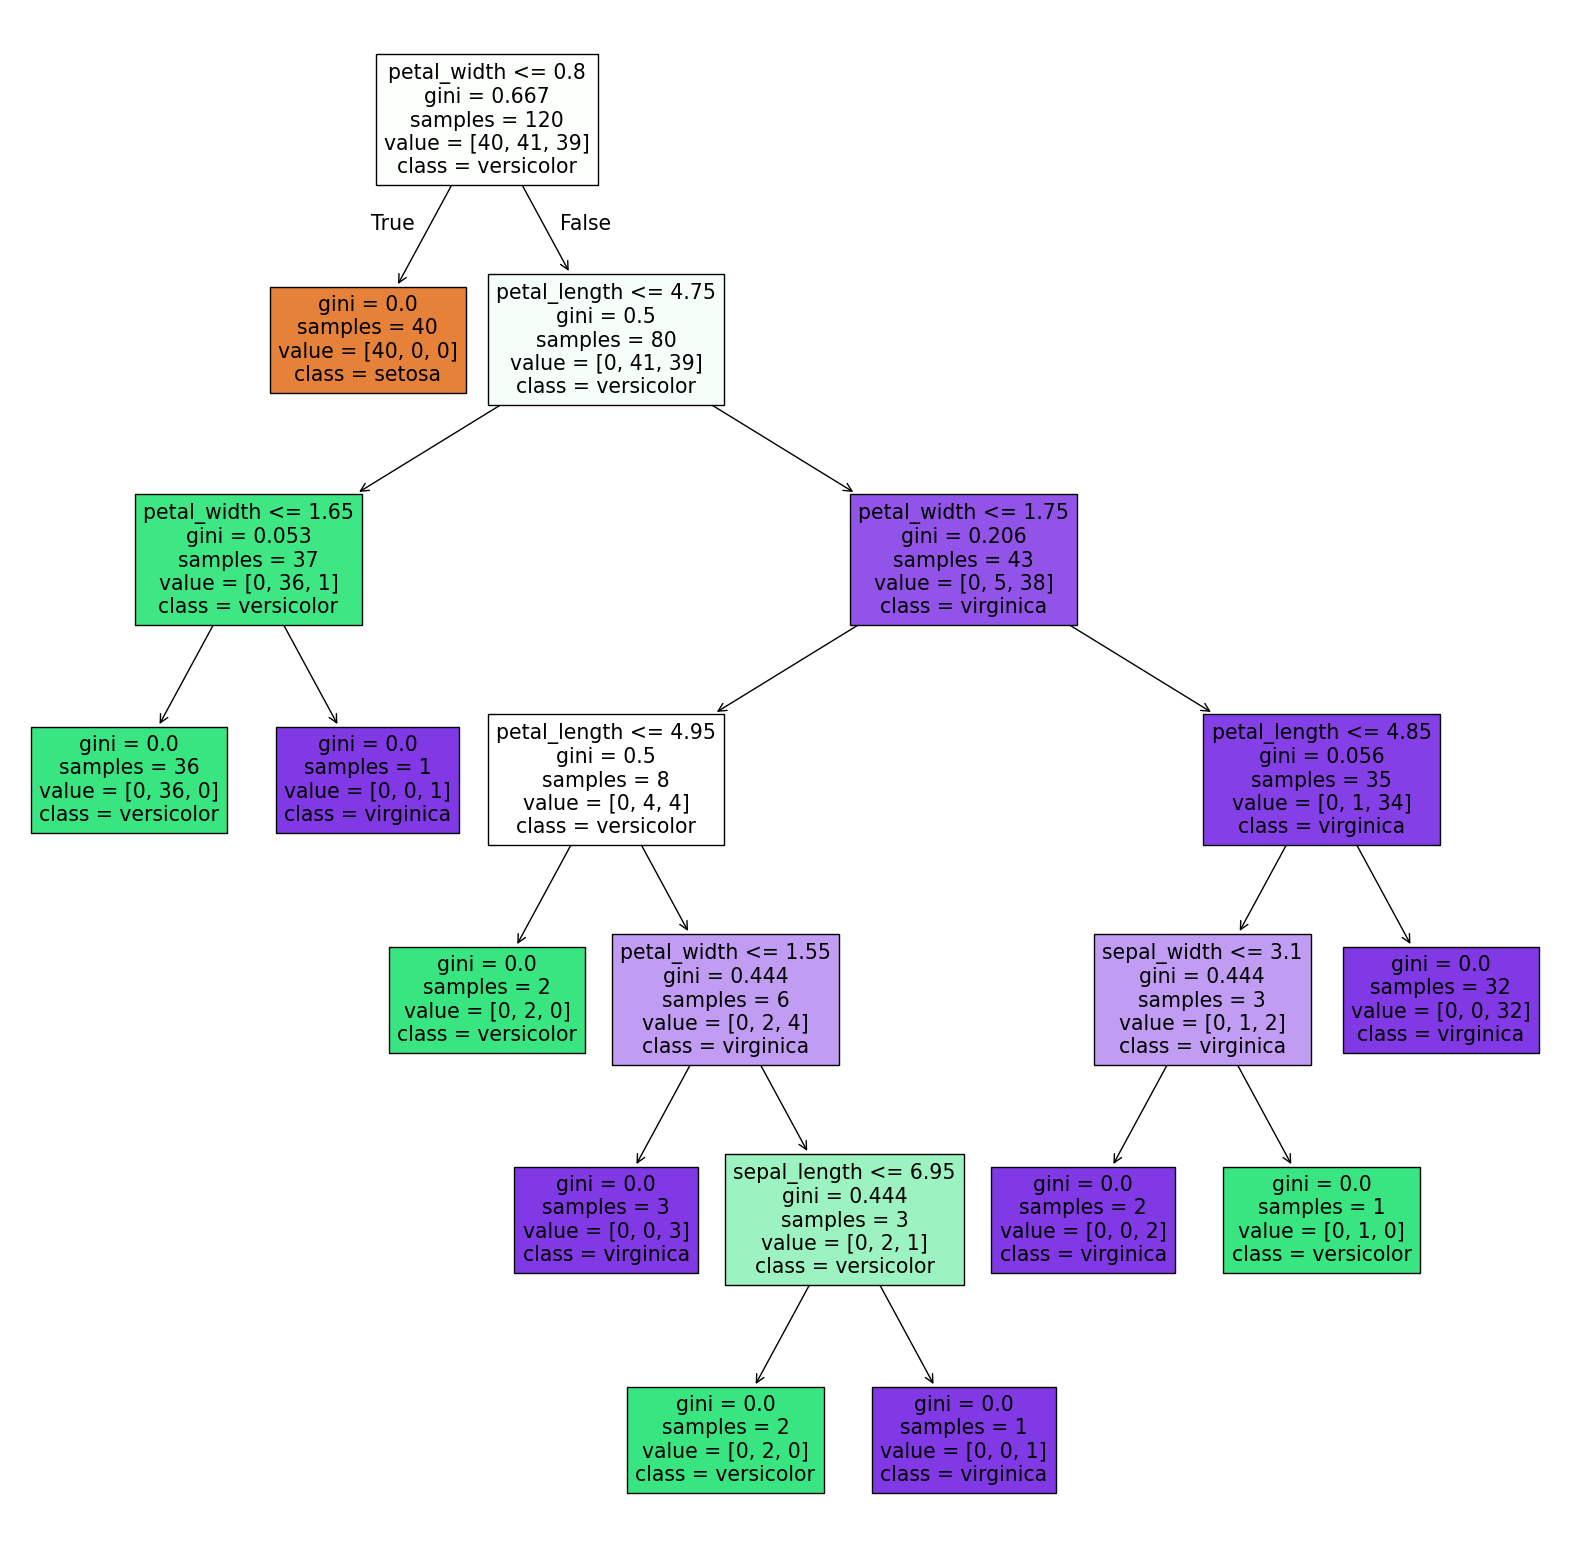

In [82]:
plt.figure(figsize=(20,20))
plot_tree(decision_tree=arbol,
          class_names=['setosa', 'versicolor', 'virginica'],
          feature_names=df.columns.to_list(),
          filled=True);


# Bosques Aleatorios

In [7]:
ruta = '/home/anderson-josue/Documents/Data Science/Day 11/datos_tarjetas/tarjetas_credito.csv'

df = pd.read_csv(ruta)
df.head()

,Duracion,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Monto,Clase
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
escala = MinMaxScaler(feature_range=(0, 1))
normado = escala.fit_transform(df)
df_normado = pd.DataFrame(data=normado, columns=df.columns)
df_normado.head()

,Duracion,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Monto,Clase
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0


In [9]:
X = df_normado.drop('Clase', axis=1)

In [10]:
y = df_normado['Clase']

In [11]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
284802    0.0
284803    0.0
284804    0.0
284805    0.0
284806    0.0
Name: Clase, Length: 284807, dtype: float64

In [88]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, train_size=0.7, random_state=42)

In [89]:
forest = RandomForestClassifier()
forest.fit(X_entrena, y_entrena)

RandomForestClassifier()

In [90]:
forest.score(X_prueba, y_prueba)

0.9995903701883126

In [91]:
nuevo_registro = pd.DataFrame({
    'Duracion': [0.000006], 'V1': [0.452345], 'V2': [0.564789], 'V3': [0.123456], 'V4': [0.654321],
    'V5': [0.987654], 'V6': [0.345678], 'V7': [0.234567], 'V8': [0.876543], 'V9': [0.456789],
    'V10': [0.567890], 'V11': [0.678901], 'V12': [0.789012], 'V13': [0.890123], 'V14': [0.901234],
    'V15': [0.012345], 'V16': [0.543210], 'V17': [0.432109], 'V18': [0.321098], 'V19': [0.210987],
    'V20': [0.109876], 'V21': [0.098765], 'V22': [0.887654], 'V23': [0.776543], 'V24': [0.665432],
    'V25': [0.554321],     'V26': [0.443210], 'V27': [0.332109], 'V28': [0.221098], 'Monto': [0.110987]
}, index=[0])

In [93]:
clase_predicha = forest.predict(nuevo_registro)
clase_predicha

array([0.])

In [96]:
probabilidades = forest.predict_proba(nuevo_registro)
probabilidades

array([[0.67, 0.33]])

In [98]:
print('Clase predicha: ', clase_predicha[0])
print('Probabilidades de legitimidad:', probabilidades[0][0])
print('Probabilidad de Fraude: ', probabilidades[0][1])

Clase predicha:  0.0
Probabilidades de legitimidad: 0.67
Probabilidad de Fraude:  0.33


# Anotaciones importantes

In [26]:
modelos = [
    ('Regresion Logistica', LogisticRegression()),
    ('Arbol de decision', DecisionTreeClassifier(random_state=42)),
    ('Bosque Aleatorio', RandomForestClassifier(random_state=42))
]

In [27]:
for nombre, modelo in modelos:
    modelo.fit(X_entrena, y_entrena)
    puntaje = modelo.score(X_prueba, y_prueba)
    print(f'{nombre}: {puntaje: .4f}')

Regresion Logistica:  1.0000
Arbol de decision:  1.0000
Bosque Aleatorio:  1.0000
